# The Battle of Neighborhoods

## 1. Business Problem and Background

In this project we will try to find an optimal location for a restaurant. Specifically, this report will be targeted to stakeholders interested in opening a new restaurant in Düsseldorf, Germany.

Since there are lots of restaurants in Düsseldorf we will try to detect the locations which are already crowded. We will compare the result with the population density of Düsseldorf to find the optimal location for a new restaurant, which would be in an area of dense population with no or few restaurants in close vicinity.

We will use our data science powers to generate a map which will show the discussed information. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

## 2. Data

### 2.1 Required Data
Based on our requirements, the following data will be needed:
* Population density of each neighborhood in Dusseldorf
* Restaurants in each neighborhood in Dusseldorf and their coordinates (latitude and longitude)
* To visualize the density of population of neighborhoods by using Folium, we will need a GeoJSON of Dusseldorf with the boundaries between different neighborhoods
* To find the restaurants in each neighborhood by using Foursquare API, we will need the coordinates of each neighborhood in Dusseldorf

### 2.2 Data Sources
There is a website named "Open Data Düsseldorf" which provides extensive data relating to Düsseldorf:
* For population of each neighborhood, the csv file "Einwohnerzahl nach Stadtteilen_seit2012.csv" is downloaded from the website. (https://opendata.duesseldorf.de/dataset/einwohnerzahl-d%C3%BCsseldorf-seit-2012-einwohnermeldedaten)
* To calculate the density, we need to know the area of each neighborhood. For this, the csv file "Fläche der Stadtteile von Düsseldorf in Quadratkilometern_1_0.csv" is downloaded from the website. (https://opendata.duesseldorf.de/dataset/fl%C3%A4chengr%C3%B6%C3%9Fen-d%C3%BCsseldorf-auf-verschiedenen-ebenen)
* For the boundaries between different neighborhoods, the json file "Stadtteile_WGS84_4326.json" is downloaded from the website. (https://opendata.duesseldorf.de/dataset/stadtteilgrenzen-d%C3%BCsseldorf)

The coordinates of each neighborhood come from Wikipedia page of each neighborhood. A dataframe will be created manually by using this information.

For restaurants in each neighborhood and their coordinates, we will use Foursquare API service to pass the coordinate of each neighborhood to explore the "Restaurant" venues in the neighborhood.

## 3. Data Acquisition & Pre-Processing

In [74]:
import pandas as pd
import numpy as np
import folium
import requests

print('Labraries imported!')

Labraries imported!


#### Get population data of each neighborhood in Dusseldorf.

This csv file is from the website "Open Data Düsseldorf".

In [75]:
df_pop = pd.read_csv('Einwohnerzahl nach Stadtteilen_seit2012.csv',sep=';')
df_pop = df_pop.sort_values(by=['Stadtteilname'])
df_pop = df_pop.reset_index(drop=True)
df_pop = df_pop.rename(columns = {'Stadtteilnummer':'Neighborhood_Nr','Stadtteilname':'Neighborhood'})
df_pop

Neighborhood_Nr     Neighborhood   2012   2013   2014   2015   2016   2017  \
0              011         Altstadt   2232   2253   2221   2264   2244   2358   
1              055        Angermund   6273   6258   6240   6494   6580   6621   
2              095          Benrath  16099  16054  16118  16644  16735  16833   
3              036             Bilk  38523  39165  39708  39899  40038  40552   
4              012        Carlstadt   2290   2323   2315   2491   2588   2279   
5              015        Derendorf  19740  19927  20005  20232  20401  20651   
6              023        Düsseltal  26848  26983  27434  27861  28141  28149   
7              082            Eller  30934  31147  31307  31407  31516  31732   
8              038            Flehe   2571   2578   2535   2547   2687   2725   
9              022    Flingern Nord  22125  22261  22874  23349  23851  24617   
10             021     Flingern Süd  10025  10130  10227  10291  10348  10319   
11             031   Friedrichstadt  18656  18927  19471  19630  19984  19616   
12             101           Garath  18364  18470  18729  19068  19042  19143   
13             071       Gerresheim  28889  28969  29233  29544  29585  29761   
14             016         Golzheim  11956  12086  12279  12913  12702  12520   
15             072       Grafenberg   5686   5723   5749   5749   5832   5898   
16             034             Hamm   4023   4066   4188   4305   4399   4444   
17             098          Hassels  17746  18036  17536  17398  17668  17517   
18             042           Heerdt   9876   9968  10102  10315  11028  11398   
19             102        Hellerhof   6138   6071   5980   5913   6041   5969   
20             092      Himmelgeist   1835   1965   2019   2032   2034   2058   
21             093       Holthausen  12326  12510  12557  12540  13041  12899   
22             074      Hubbelrath*   3716   3646   1571   1535   1722   1645   
23             097            Itter   2091   2174   2304   2345   2357   2376   
24             053     Kaiserswerth   7871   7848   7905   8018   8112   8038   
25             056           Kalkum   1987   1919   1926   1959   1983   1973   
26             075       Knittkuhl*      X      X   2055   2048   2078   2091   
27             061    Lichtenbroich   5720   5587   5500   5539   6031   6204   
28             081       Lierenfeld  10315  10468  10525  10545  10562  10809   
29             052         Lohausen   3979   4005   4046   4193   4188   4129   
30             073        Ludenberg   7269   7526   7705   7962   8079   8240   
31             043           Lörick   7508   7320   7338   7508   7608   7625   
32             064     Mörsenbroich  14540  14803  15423  16351  17407  18002   
33             044     Niederkassel   5920   5884   5904   5900   5970   6047   
34             037         Oberbilk  29715  30049  30288  30556  30446  30391   
35             041       Oberkassel  17945  17975  18238  18495  18840  18949   
36             014       Pempelfort  29931  30345  30814  31449  31897  32626   
37             063             Rath  19503  19577  19923  20206  20231  20205   
38             094         Reisholz   3704   3711   3738   3836   3737   3777   
39             013       Stadtmitte  13900  13953  14388  14680  15008  14840   
40             051          Stockum   5265   5317   5409   5671   5607   5589   
41             084        Unterbach   7295   7346   7465   7552   7641   7636   
42         032/033  Unterbilk/Hafen  18616  18846  18846  19033  19182  19408   
43             062        Unterrath  21174  21234  21280  21625  21746  21711   
44             096        Urdenbach  10625  10561  10609  10657  10682  10685   
45             083       Vennhausen  10320  10533  10509  10436  10514  10535   
46             035     Volmerswerth   2266   2273   2306   2353   2350   2345   
47             091          Wersten  26665  26844  26924  27116  27232  27366   
48             054         Wittlae

#### Data Cleaning

There are two neighborhood names which contain * in the name. We need to remove it. The neighborhood Unterbilk and Hafen are in the same row. We need to split them up. 

In [76]:
df_pop['Neighborhood'] = df_pop['Neighborhood'].map(lambda x: x.rstrip('*'))
df_pop_row = df_pop.loc[42].tolist()
df_pop.loc[len(df_pop)] = df_pop_row
df_pop.loc[42,'Neighborhood'] = 'Unterbilk'
df_pop.loc[49,'Neighborhood'] = 'Hafen'
df_pop = df_pop.sort_values(by=['Neighborhood'])
df_pop = df_pop.reset_index(drop=True)

In [77]:
df_pop

Neighborhood_Nr    Neighborhood   2012   2013   2014   2015   2016   2017  \
0              011        Altstadt   2232   2253   2221   2264   2244   2358   
1              055       Angermund   6273   6258   6240   6494   6580   6621   
2              095         Benrath  16099  16054  16118  16644  16735  16833   
3              036            Bilk  38523  39165  39708  39899  40038  40552   
4              012       Carlstadt   2290   2323   2315   2491   2588   2279   
5              015       Derendorf  19740  19927  20005  20232  20401  20651   
6              023       Düsseltal  26848  26983  27434  27861  28141  28149   
7              082           Eller  30934  31147  31307  31407  31516  31732   
8              038           Flehe   2571   2578   2535   2547   2687   2725   
9              022   Flingern Nord  22125  22261  22874  23349  23851  24617   
10             021    Flingern Süd  10025  10130  10227  10291  10348  10319   
11             031  Friedrichstadt  18656  18927  19471  19630  19984  19616   
12             101          Garath  18364  18470  18729  19068  19042  19143   
13             071      Gerresheim  28889  28969  29233  29544  29585  29761   
14             016        Golzheim  11956  12086  12279  12913  12702  12520   
15             072      Grafenberg   5686   5723   5749   5749   5832   5898   
16         032/033           Hafen  18616  18846  18846  19033  19182  19408   
17             034            Hamm   4023   4066   4188   4305   4399   4444   
18             098         Hassels  17746  18036  17536  17398  17668  17517   
19             042          Heerdt   9876   9968  10102  10315  11028  11398   
20             102       Hellerhof   6138   6071   5980   5913   6041   5969   
21             092     Himmelgeist   1835   1965   2019   2032   2034   2058   
22             093      Holthausen  12326  12510  12557  12540  13041  12899   
23             074      Hubbelrath   3716   3646   1571   1535   1722   1645   
24             097           Itter   2091   2174   2304   2345   2357   2376   
25             053    Kaiserswerth   7871   7848   7905   8018   8112   8038   
26             056          Kalkum   1987   1919   1926   1959   1983   1973   
27             075       Knittkuhl      X      X   2055   2048   2078   2091   
28             061   Lichtenbroich   5720   5587   5500   5539   6031   6204   
29             081      Lierenfeld  10315  10468  10525  10545  10562  10809   
30             052        Lohausen   3979   4005   4046   4193   4188   4129   
31             073       Ludenberg   7269   7526   7705   7962   8079   8240   
32             043          Lörick   7508   7320   7338   7508   7608   7625   
33             064    Mörsenbroich  14540  14803  15423  16351  17407  18002   
34             044    Niederkassel   5920   5884   5904   5900   5970   6047   
35             037        Oberbilk  29715  30049  30288  30556  30446  30391   
36             041      Oberkassel  17945  17975  18238  18495  18840  18949   
37             014      Pempelfort  29931  30345  30814  31449  31897  32626   
38             063            Rath  19503  19577  19923  20206  20231  20205   
39             094        Reisholz   3704   3711   3738   3836   3737   3777   
40             013      Stadtmitte  13900  13953  14388  14680  15008  14840   
41             051         Stockum   5265   5317   5409   5671   5607   5589   
42             084       Unterbach   7295   7346   7465   7552   7641   7636   
43         032/033       Unterbilk  18616  18846  18846  19033  19182  19408   
44             062       Unterrath  21174  21234  21280  21625  21746  21711   
45             096       Urdenbach  10625  10561  10609  10657  10682  10685   
46             083      Vennhausen  10320  10533  10509  10436  10514  10535   
47             035    Volmerswerth   2266   2273   2306   2353   2350   2345   
48             091         Wersten  26665  26844  26924  27116  27232  27366   
49 

#### Calculate the population density

To calculate the density, we need to know the area of each neighborhood. This information is contained in the csv file "Fläche der Stadtteile von Düsseldorf in Quadratkilometern_1_0.csv", which can be downloaded on the website "Open Data Düsseldorf".

In [78]:
df_area = pd.read_csv('Fläche der Stadtteile von Düsseldorf in Quadratkilometern_1_0.csv',sep=';')
df_area.columns = ['Neighborhood_Nr','Neighborhood','Area']
df_area.head()

Neighborhood_Nr Neighborhood  Area
0               11     Altstadt  0,45
1               12    Carlstadt  0,45
2               13   Stadtmitte  1,77
3               14   Pempelfort  2,71
4               15    Derendorf  3,38

In [79]:
df_pop_den = pd.merge(df_pop,df_area,on='Neighborhood',how='outer')
df_pop_den.head()

Neighborhood_Nr_x Neighborhood   2012   2013   2014   2015   2016   2017  \
0               011     Altstadt   2232   2253   2221   2264   2244   2358   
1               055    Angermund   6273   6258   6240   6494   6580   6621   
2               095      Benrath  16099  16054  16118  16644  16735  16833   
3               036         Bilk  38523  39165  39708  39899  40038  40552   
4               012    Carlstadt   2290   2323   2315   2491   2588   2279   

    2018   2019  Neighborhood_Nr_y   Area  
0   2404   2453                 11   0,45  
1   6626   6745                 55  13,33  
2  16751  16583                 95   6,01  
3  40651  41128                 36   6,13  
4   2285   2281                 12   0,45

In [80]:
df_pop_den['Area'] = df_pop_den['Area'].apply(lambda x: x.replace(',','.'))
df_pop_den['Area'] = df_pop_den['Area'].astype(float)
df_pop_den['Density'] = df_pop_den['2019']/df_pop_den['Area']
df_pop_den = df_pop_den[['Neighborhood','2019','Area','Density']]
df_pop_den.head()

Neighborhood   2019   Area      Density
0     Altstadt   2453   0.45  5451.111111
1    Angermund   6745  13.33   506.001500
2      Benrath  16583   6.01  2759.234609
3         Bilk  41128   6.13  6709.298532
4    Carlstadt   2281   0.45  5068.888889

#### Create the dataframe for coordinates of each neighborhood.

Unfortunately I did not find any data or table that contains the neighborhoods and their coordinates. Therefore we need to create the data munaully. The coordinates are from Wikipedia of each neighborhood site.

In [81]:
df_coord_list = [['Altstadt', 51.228889, 6.773611],
                 ['Angermund', 51.329969, 6.780108],
                 ['Benrath', 51.161389, 6.873889],
                 ['Bilk', 51.208056, 6.776667],
                 ['Carlstadt', 51.222778, 6.770833],
                 ['Derendorf', 51.243889, 6.792222],
                 ['Düsseltal', 51.236667, 6.80944],
                 ['Eller', 51.200556, 6.838889],
                 ['Flehe', 51.187778, 6.772222],
                 ['Flingern Nord', 51.226944, 6.813056],
                 ['Flingern Süd', 51.226944, 6.813056],
                 ['Friedrichstadt', 51.212222, 6.780556],
                 ['Garath', 51.143333, 6.897222],
                 ['Gerresheim', 51.23693, 6.86134],
                 ['Golzheim', 51.243333, 6.772222],
                 ['Grafenberg', 51.240833, 6.824722],
                 ['Hafen', 51.219167, 6.757778],
                 ['Hamm', 51.205, 6.744444],
                 ['Hassels', 51.178333, 6.873889],
                 ['Heerdt', 51.228333, 6.715833],
                 ['Hellerhof', 51.132375, 6.908144],
                 ['Himmelgeist', 51.172778, 6.809722],
                 ['Holthausen', 51.172222, 6.8275],
                 ['Hubbelrath', 51.256667, 6.910556],
                 ['Itter', 51.165, 6.815],
                 ['Kaiserswerth', 51.291667, 6.739167],
                 ['Kalkum', 51.306389, 6.7625],
                 ['Knittkuhl', 51.26759, 6.87192],
                 ['Lichtenbroich', 51.268333, 6.783333],
                 ['Lierenfeld', 51.209167, 6.8275],
                 ['Lörick', 51.246389, 6.727778],
                 ['Lohausen', 51.280833, 6.736667],
                 ['Ludenberg', 51.257222, 6.864167],
                 ['Mörsenbroich', 51.255, 6.807778],
                 ['Niederkassel', 51.24, 6.749722],
                 ['Oberbilk', 51.216111, 6.803611],
                 ['Oberkassel', 51.230278, 6.755],
                 ['Pempelfort', 51.238056, 6.786944],
                 ['Rath', 51.266111, 6.814167],
                 ['Reisholz', 51.176667, 6.865833],
                 ['Stadtmitte', 51.224444, 6.786944],
                 ['Stockum', 51.26, 6.753611],
                 ['Unterbach', 51.2, 6.9],
                 ['Unterbilk', 51.208056, 6.776667],
                 ['Unterrath', 51.273611, 6.790556],
                 ['Urdenbach', 51.145833, 6.866944],
                 ['Vennhausen ', 51.210833, 6.86],
                 ['Volmerswerth', 51.188333, 6.763889],
                 ['Wersten', 51.181667, 6.816389],
                 ['Wittlaer', 51.318611, 6.743333]
             ]
df_coord = pd.DataFrame(df_coord_list)
df_coord.columns = ['Neighborhood','Latitude','Longitude']
df_coord.head()

Neighborhood   Latitude  Longitude
0     Altstadt  51.228889   6.773611
1    Angermund  51.329969   6.780108
2      Benrath  51.161389   6.873889
3         Bilk  51.208056   6.776667
4    Carlstadt  51.222778   6.770833

#### Plot a heat map of population of each Neighborhood in Dusseldorf by using Folium Choropleth

A `Choropleth` map is a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map, such as population density or per-capita income. The choropleth map provides an easy way to visualize how a measurement varies across a geographic area or it shows the level of variability within a region.

We will create a Choropleth map to show the population of each neighborhood in Dusseldorf.

In order to create a `Choropleth` map, we need a GeoJSON file that defines the areas/boundaries of the neighborhoods. This GeoJSON file is from the website "Open Data Düsseldorf" as well.

In [82]:
dusseldorf_geo = r'Stadtteile_WGS84_4326.json' # geojson file
dus_latitude = 51.225556
dus_longitude = 6.782778

In [83]:
# create a numpy array of length 6 and has linear spacing from the minium to the maximum population density
threshold_scale = np.linspace(df_pop_den['Density'].min(),
                              df_pop_den['Density'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum population density

# create a dusseldorf map
dus_map = folium.Map(location=[dus_latitude, dus_longitude], zoom_start=11)

# generate choropleth map using the total population of each neighborhood in 2019
dus_map.choropleth(
    geo_data=dusseldorf_geo,
    data=df_pop_den,
    columns=['Neighborhood', 'Density'],
    key_on='feature.properties.Name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Population'
)

dus_map

## 4. Venues Exploration

In [104]:
CLIENT_ID = 'XXX' # your Foursquare ID
CLIENT_SECRET = 'XXX' # your Foursquare Secret
ACCESS_TOKEN = 'XXX'
VERSION = '20180604'
LIMIT = 1000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XXX
CLIENT_SECRET:XXX


#### Explore venues by using Foursquare API services

Define a function to explore the specifice venues near by a spot by using a search query and the coordinates of this spot.

In [91]:
def getSpecificVenues(query, names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print('Neighborhood:', name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            lng,
            ACCESS_TOKEN, 
            VERSION, 
            query, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng']) for v in results])

    df_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    
    df_venues.columns = ['Neighborhood', 
                  'Neighborhood_Latitude', 
                  'Neighborhood_Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude']
    
    return(df_venues)

In our case we will search for restaurants. I set the radius to 1000 m to ensure finding as more restaurants as possible. Don't worry to find duplicated venues. We will drop the duplications later

In [92]:
search_query = 'Restaurant'
radius = 1000

search_venues = getSpecificVenues(query=search_query,
                                 names=df_coord['Neighborhood'],
                                 latitudes=df_coord['Latitude'],
                                 longitudes=df_coord['Longitude'],
                                 radius=radius
                                  )

Neighborhood: Altstadt
Neighborhood: Angermund
Neighborhood: Benrath
Neighborhood: Bilk
Neighborhood: Carlstadt
Neighborhood: Derendorf
Neighborhood: Düsseltal
Neighborhood: Eller
Neighborhood: Flehe
Neighborhood: Flingern Nord
Neighborhood: Flingern Süd
Neighborhood: Friedrichstadt
Neighborhood: Garath
Neighborhood: Gerresheim
Neighborhood: Golzheim
Neighborhood: Grafenberg
Neighborhood: Hafen
Neighborhood: Hamm
Neighborhood: Hassels
Neighborhood: Heerdt
Neighborhood: Hellerhof
Neighborhood: Himmelgeist
Neighborhood: Holthausen
Neighborhood: Hubbelrath
Neighborhood: Itter
Neighborhood: Kaiserswerth
Neighborhood: Kalkum
Neighborhood: Knittkuhl
Neighborhood: Lichtenbroich
Neighborhood: Lierenfeld
Neighborhood: Lörick
Neighborhood: Lohausen
Neighborhood: Ludenberg
Neighborhood: Mörsenbroich
Neighborhood: Niederkassel
Neighborhood: Oberbilk
Neighborhood: Oberkassel
Neighborhood: Pempelfort
Neighborhood: Rath
Neighborhood: Reisholz
Neighborhood: Stadtmitte
Neighborhood: Stockum
Neighborhoo

In [93]:
print(search_venues.shape)
search_venues.head()

(428, 6)


Neighborhood  Neighborhood_Latitude  Neighborhood_Longitude  \
0     Altstadt              51.228889                6.773611   
1     Altstadt              51.228889                6.773611   
2     Altstadt              51.228889                6.773611   
3     Altstadt              51.228889                6.773611   
4     Altstadt              51.228889                6.773611   

                          Venue  Venue_Latitude  Venue_Longitude  
0           Colosseo Restaurant       51.227416         6.773395  
1       DINEA Café & Restaurant       51.226170         6.778250  
2  Mayur - Indisches Restaurant       51.222798         6.774171  
3            Frank's Restaurant       51.229230         6.774377  
4        Restaurant El Flamenco       51.225768         6.773355

Let's have a look on how many restaurants did we find in each neighborhood. The number of venues per API call is limited to 50. We could see that "Carlstadt" and "Stadtmitte" both have 50 venues. But we wouldn't worry that there are more venues not being included, because the both neighborhoods are in the center of the city and surrounded by enough other neighborhoods which will find the rest of venues.

In [94]:
search_venues.groupby('Neighborhood').count()

Neighborhood_Latitude  Neighborhood_Longitude  Venue  \
Neighborhood                                                           
Altstadt                           37                      37     37   
Angermund                           1                       1      1   
Benrath                             3                       3      3   
Bilk                               21                      21     21   
Carlstadt                          50                      50     50   
Derendorf                          15                      15     15   
Düsseltal                          17                      17     17   
Flehe                               1                       1      1   
Flingern Nord                      15                      15     15   
Flingern Süd                       15                      15     15   
Friedrichstadt                     37                      37     37   
Gerresheim                          2                       2      2   
Golzheim                           11                      11     11   
Grafenberg                          4                       4      4   
Hafen                              25                      25     25   
Hamm                                4                       4      4   
Hassels                             2                       2      2   
Hubbelrath                          2                       2      2   
Kaiserswerth                        3                       3      3   
Lichtenbroich                       6                       6      6   
Lierenfeld                          2                       2      2   
Lohausen                            3                       3      3   
Ludenberg                           1                       1      1   
Lörick                              7                       7      7   
Mörsenbroich                        2                       2      2   
Niederkassel                        6                       6      6   
Oberbilk                           24                      24     24   
Oberkassel                          1                       1      1   
Pempelfort                         14                      14     14   
Rath                                1                       1      1   
Reisholz                            1                       1      1   
Stadtmitte                         50                      50     50   
Stockum                             7                       7      7   
Unterbach                           4                       4      4   
Unterbilk                          21                      21     21   
Unterrath                           7                       7      7   
Vennhausen                          3                       3      3   
Volmerswerth                        1                       1      1   
Wersten                             1                       1      1   
Wittlaer                            1                       1      1   

                Venue_Latitude  Venue_Longitude  
Neighborhood                                     
Altstadt                    37               37  
Angermund                    1                1  
Benrath                      3                3  
Bilk                        21               21  
Carlstadt                   50               50  
Derendorf                   15               15  
Düsseltal                   17               17  
Flehe                        1                1  
Flingern Nord               15               15  
Flingern Süd                15               15  
Friedrichstadt              37               37  
Gerresheim                   2                2  
Golzheim                    11               11  
Grafenberg                   4                4  
Hafen                       25               25  
Hamm                         4                4  
Hassels                      2                2  
Hubbelrath                   2           

#### Plot the Choropleth map with the found venues

In [95]:
dusseldorf_geo = r'Stadtteile_WGS84_4326.json' # geojson file
dus_latitude = 51.225556
dus_longitude = 6.782778
# create a numpy array of length 6 and has linear spacing from the minium to the maximum population density
threshold_scale = np.linspace(df_pop_den['Density'].min(),
                              df_pop_den['Density'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum population density

# create a dusseldorf map
dus_map = folium.Map(location=[dus_latitude, dus_longitude], zoom_start=11)

# generate choropleth map using the total population of each neighborhood in 2019
dus_map.choropleth(
    geo_data=dusseldorf_geo,
    data=df_pop_den,
    columns=['Neighborhood', 'Density'],
    key_on='feature.properties.Name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Population'
)

# instantiate a feature group for the positions in the dataframe
feat_group_venues = folium.map.FeatureGroup()

# loop through the coordinats data and add each to the feature group
for lat, lng, in zip(search_venues.Venue_Latitude, search_venues.Venue_Longitude):
    feat_group_venues.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add feature group to map
dus_map.add_child(feat_group_venues)


## 5. Machine Learning - Clustering - Density-based Clustering (DBSCAN)

In [96]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

#### Cleaning - Drop Duplicates.

The algorithm DBSCAN has the parameter “min_samples”, which defines the threshold how many samples should be at least within a radius (parameter epsilon). The duplicates will increase the number of data samples within the defined radius, so that this will affect our results. Therefore, we need to drop the duplicates at first.

In [97]:
df_venues = search_venues[['Venue','Venue_Latitude','Venue_Longitude']]
print('Size before drop duplicates:', df_venues.shape)

df_venues = df_venues.drop_duplicates(subset ="Venue")
print('Size after drop duplicates:', df_venues.shape)

df_venues.head()

Size before drop duplicates: (428, 3)
Size after drop duplicates: (195, 3)


Venue  Venue_Latitude  Venue_Longitude
0           Colosseo Restaurant       51.227416         6.773395
1       DINEA Café & Restaurant       51.226170         6.778250
2  Mayur - Indisches Restaurant       51.222798         6.774171
3            Frank's Restaurant       51.229230         6.774377
4        Restaurant El Flamenco       51.225768         6.773355

#### Standardization

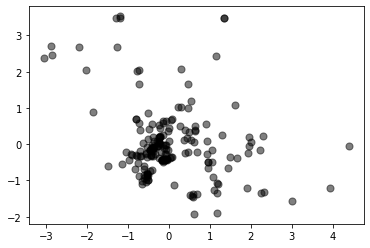

In [98]:
X = df_venues[['Venue_Latitude','Venue_Longitude']]
X_std = StandardScaler().fit_transform(X)
plt.scatter(X_std[:, 0], X_std[:, 1],s=50, c=['k'], marker=u'o', alpha=0.5)

#### Trainig Model

The parameter values are selected from the best practice.

In [99]:
epsilon = 0.27
minimumSamples = 4
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X_std)
labels = db.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  2, -1,  1,  1,  1,
        2, -1,  1,  1,  1,  0,  3,  3,  0,  0,  0,  3,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  2,  2,
        2,  2,  2,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
       -1, -1, -1, -1, -1,  4, -1,  4,  4,  4, -1,  6,  6, -1,  5,  5,  5,
        5,  5, -1, -1, -1, -1, -1, -1,  0,  0,  0,  6,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  7,  7,  7, -1,  7,  7, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

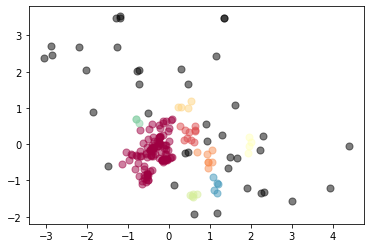

In [100]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X_std[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X_std[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

#### Results Visualization in Map

Add the label back to the dataframe

In [101]:
df_venues['Label'] =  labels.tolist()

In [102]:
print(df_venues.shape)
df_venues.head()

(195, 4)


Venue  Venue_Latitude  Venue_Longitude  Label
0           Colosseo Restaurant       51.227416         6.773395      0
1       DINEA Café & Restaurant       51.226170         6.778250      0
2  Mayur - Indisches Restaurant       51.222798         6.774171      0
3            Frank's Restaurant       51.229230         6.774377      0
4        Restaurant El Flamenco       51.225768         6.773355      0

Plot the Choropleth map - Mark each cluster as a colorful color and the outliers as black.

In [103]:
dusseldorf_geo = r'Stadtteile_WGS84_4326.json' # geojson file
dus_latitude = 51.225556
dus_longitude = 6.782778

# create a numpy array of length 6 and has linear spacing from the minium to the maximum population density
threshold_scale = np.linspace(df_pop_den['Density'].min(),
                              df_pop_den['Density'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum population density

# create a dusseldorf map
dus_map = folium.Map(location=[dus_latitude, dus_longitude], zoom_start=11)

# generate choropleth map using the total population of each neighborhood in 2019
dus_map.choropleth(
    geo_data=dusseldorf_geo,
    data=df_pop_den,
    columns=['Neighborhood', 'Density'],
    key_on='feature.properties.Name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Population'
)

# instantiate a feature group for the positions in the dataframe
feat_group_venues = folium.map.FeatureGroup()

# loop through the coordinats data and add each to the feature group
colors = ['blue', 'green', 'purple', 'cadetblue', 'darkred','beige','pink','darkblue','darkgreen','orange','darkpurple','white','lightblue','lightgreen','gray','black','lightgray ']
for lat, lng, lab in zip(df_venues.Venue_Latitude, df_venues.Venue_Longitude,df_venues.Label):
    
    if lab == -1:
        # Black used for noise.
        col = 'black'
    else:
        col = colors[lab]
        
    feat_group_venues.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color=col,
            fill=True,
            fill_color=col,
            fill_opacity=0.6
        )
    )

# add feature group to map
dus_map.add_child(feat_group_venues)

## 6. Results and Discussion

In our project, we found around 200 restaurants in Dusseldorf cross 50 neighborhoods. Our analysis by using DBSCAN algorithm segments those restaurants in 8 clusters based on the density of the restaurants. The other restaurants are marked as outliers due to the low density (no other restaurants in close vicinity).
It is not recommanded to open a new restaurant in the area of any cluster.
Furthermore, our analysis shows the population density correlates with the number of restaurants in the neighborhoods. However there are a few areas which has high population density but with a low number of restaurants, for example the center of Pempelfort, which has one of the highest populatio density in Dusseldorf and is near to the city center. Therefore we recommend this area to open a new restaurant.

During the project I recognized that there is a limitation of the results number returned by the API service up to 50. My solution is to split the search into smaller area to gain a high resolution and therefore less than 50 venues per search. I decided to take the neighborhood location points instead boroughs. The problem with that is the possibility of getting uncovered search area around the city due to the unequal distribution of search points in the neighborhoods. Therefore I increased the radius for the search which results a high number of duplications of found venues.
Since the algorithm "DBSCAN" will have the parameter min_samples, the duplicates will increase the numbers of data within the defined radius (epsilon), so that this will affect our results. Therefore we need to drop the duplicates.

For a bigger project it would be appropriate to use another service or level up the account to avoid the limitation.

## 7. Conclusion

The project aims to help a stackholder to find a location for a new restaurant in Dusseldorf. The approach is to visualize the both information of population density of each neighborhood and restaurant clustering in Dusseldorf. Therefore the stakeholder could easily find the best location where has a higher population density, but not within a restaurant cluster.

Based on the approach, we used the geographical data to gain the boundaries information between neighborhoods, the population and area data of each neighborhood to calculate the population density. Those data is available to be downloaded from the website "Open Data Düsseldorf" as csv or json file.

During the analysis part, I succesfully used the Foursquare API service to find restaurants in each neighborhood, and applied the machine learning algorithm "DBSCAN" to cluster the restaurants. With the help of the Folium visualization I could display clearly both information - population density and restaurant clustering - for the stackholder on a map at the same time.

At the end we found a area - Pempelfort - recommended to open a new restaurant there since it has a high population density but without in any restaurant cluster and is close to the city center.